In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd

from ipywidgets import interact

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,7)

# Problem 2

## 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [2]:
hf = h5py.File('/home/jovyan/Lab-4-Files/images_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [4]:
hf

<HDF5 file "images_lab4.h5" (mode r)>

In [5]:
image1 = np.array(hf.get('image1'))

In [6]:
imgstack = np.transpose(np.array(hf.get('imagestack')))

In [7]:
imgstack.shape

(10, 200, 200)

In [8]:
imgstack[0].shape

(200, 200)

In [9]:
sum(imgstack[0].flatten())

1208.7426630496484

# 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

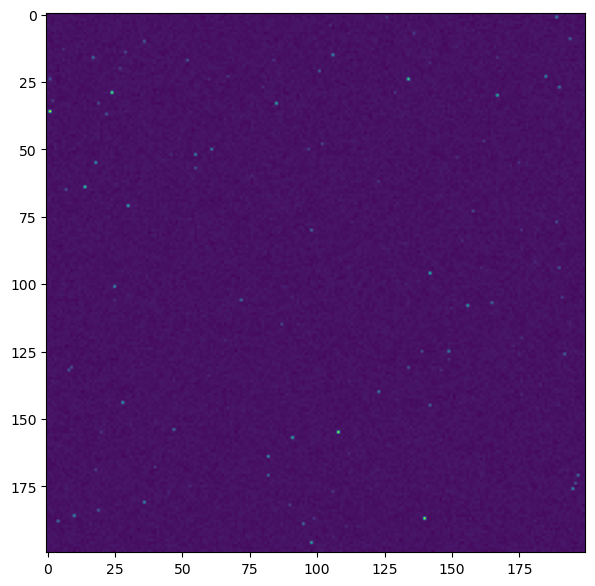

In [10]:
plt.imshow(image1)

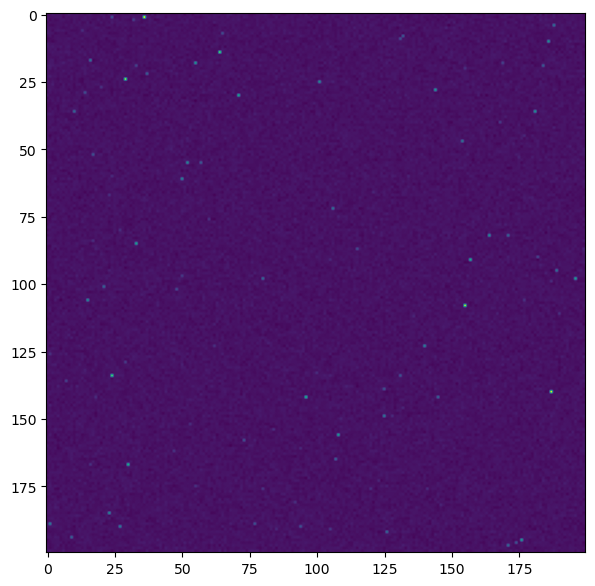

In [11]:
plt.imshow(imgstack[0])

In [12]:
def get_counts(image):
    pixel_vals = []
    for i in range(len(image[0])):
        for a in range(len(image[1])):
            pixel_vals.append(image[i][a])
    return pixel_vals

In [13]:
a = imgstack[0].flatten()

In [14]:
b = imgstack.flatten()

In [15]:
len(b)

400000

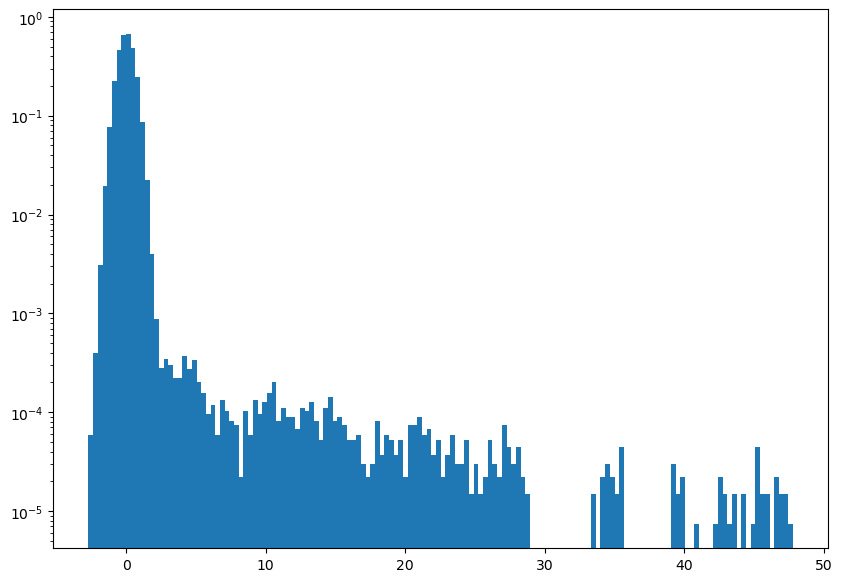

In [16]:
plt.hist(b,bins=150,density = True)
#plt.plot([2.23]*10,np.linspace(0,1,10))
#plt.plot([3.7]*10,np.linspace(0,1,10))

plt.yscale('log');

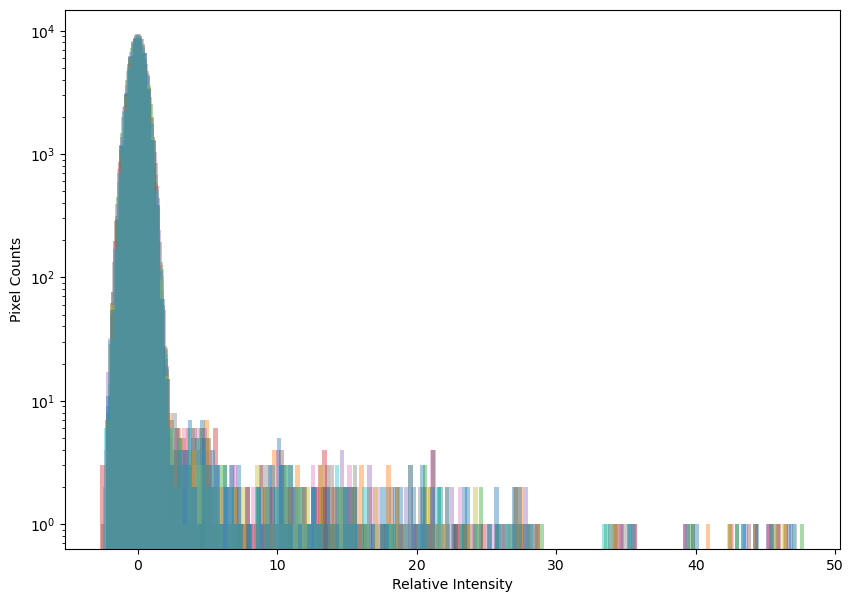

In [17]:
for image in imgstack:
    a = image.flatten()
    plt.hist(a,bins=150,alpha=0.4)
plt.hist(image1.flatten(),bins=150,alpha=0.4)
plt.yscale('log')
plt.title('')
plt.ylabel('Pixel Counts')
plt.xlabel('Relative Intensity');

# 3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.
Since we have 40,000 pixels in each image, to expect to see a pixel at an intensity would be 40,000 * probability = 1.

In [18]:
prob = 1/40000

intensity = stats.norm.ppf(1-prob,scale = 0.55)

In [19]:
intensity

2.230594839617049

I will also state that "obvious" stars are stars above 5-sigma, which is:

In [20]:
prob = stats.norm.sf(5)
five_sigma = stats.norm.ppf(1 - prob/40000,scale=0.55)

In [21]:
five_sigma

3.714976845374295

So now I will look for stars between 2.23 and 3.7 intensity, which may be good candidates for faint stars.

In [26]:
def plot_faint_stars(image):
    fig, ax = plt.subplots(1, 2)

    faint_stars = find_faint(image)
    ax[0].imshow(image)
    ax[1].imshow(faint_stars, cmap='hot')

In [48]:
def find_faint(img):
    faint_stars = np.where(img>2.23,img,100)
    faint_stars = np.where(faint_stars<5,1,0)
    return faint_stars

In [49]:
full_faints = np.zeros((200,200))
for i in imgstack:
    full_faints += find_faint(i)

In [76]:
x = []
y = []
for a in range(len(full_faints[0])):
    for i in range(len(full_faints[1])):
          if full_faints[a][i] > 0:
                x.append(a)
                y.append(i)

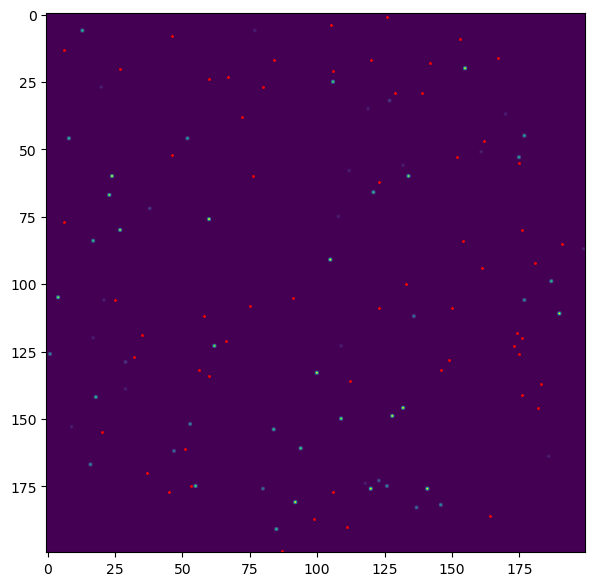

In [80]:
plt.imshow(full_faints,cmap='viridis')
plt.scatter(x,y,c='r',s=1)

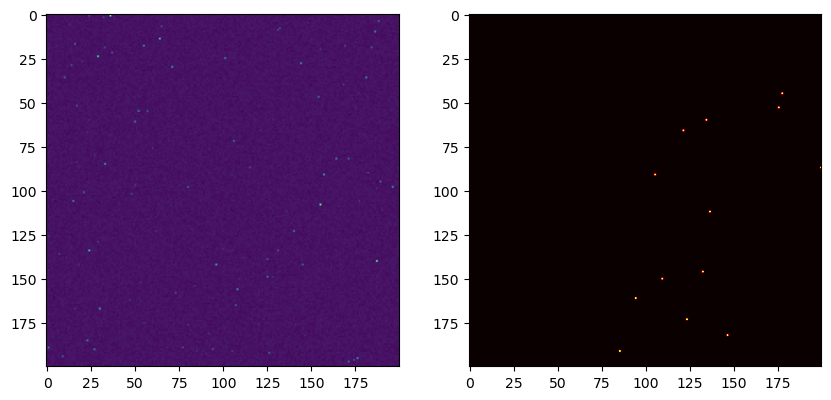

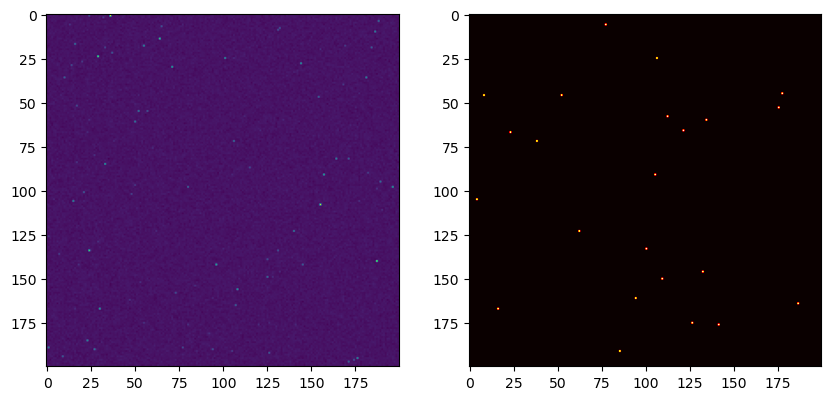

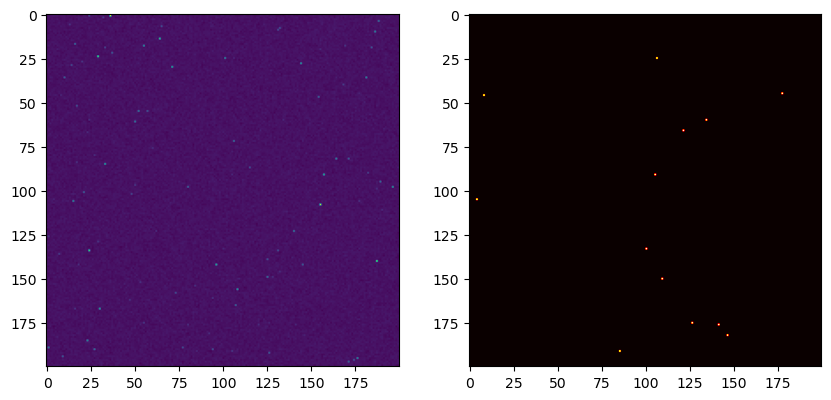

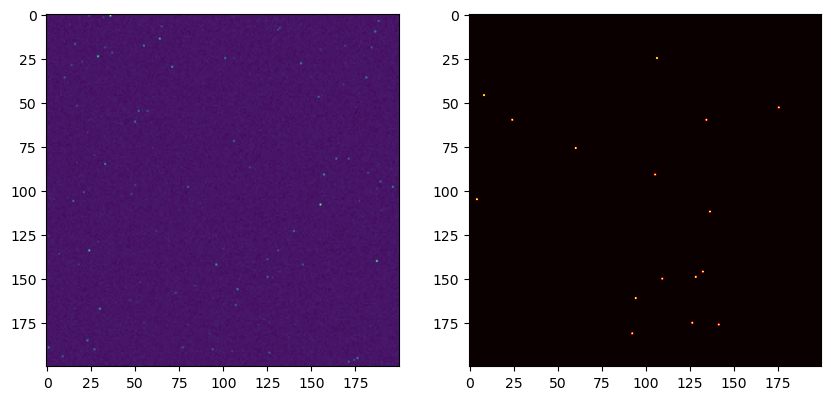

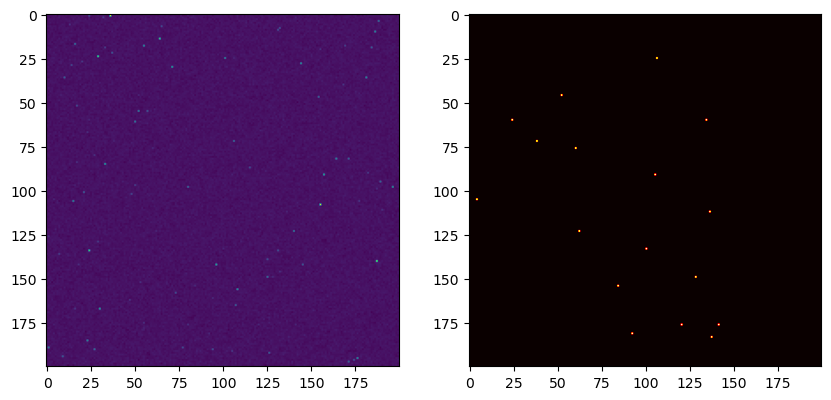

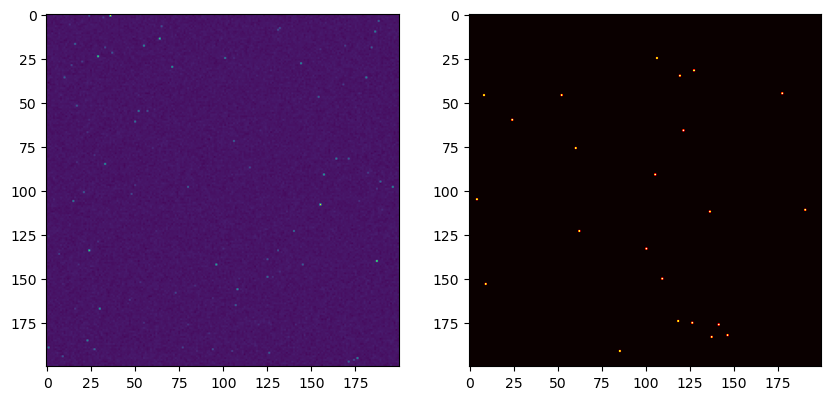

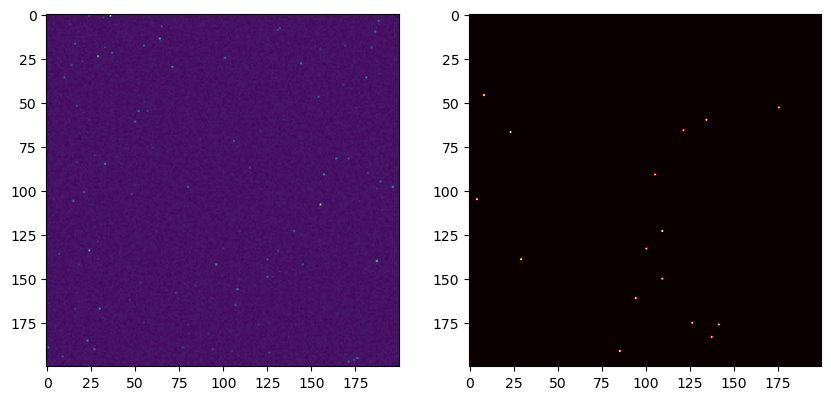

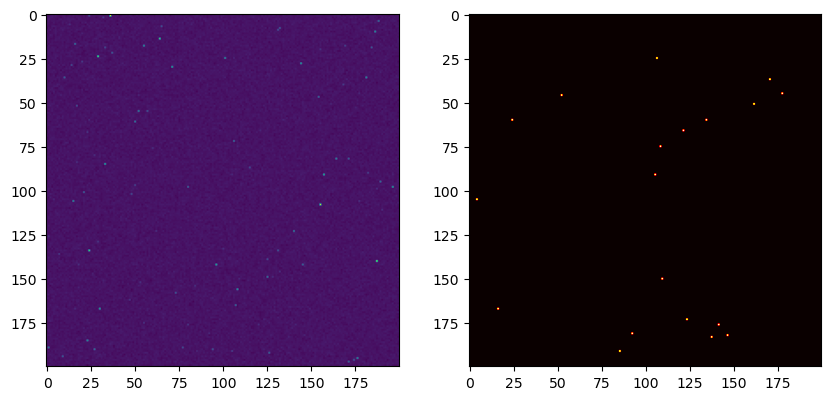

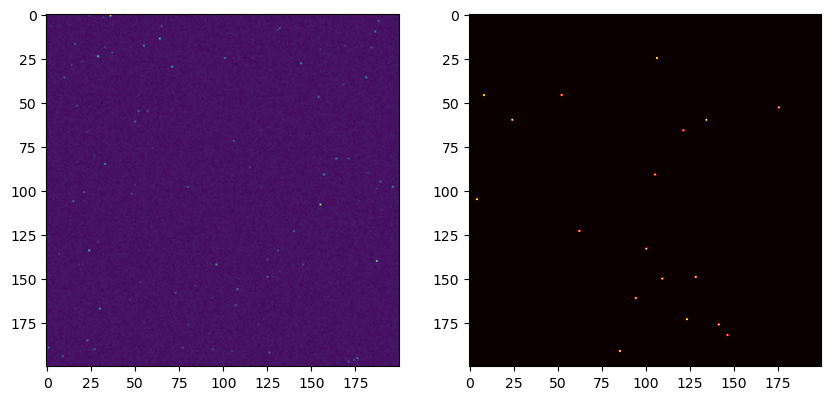

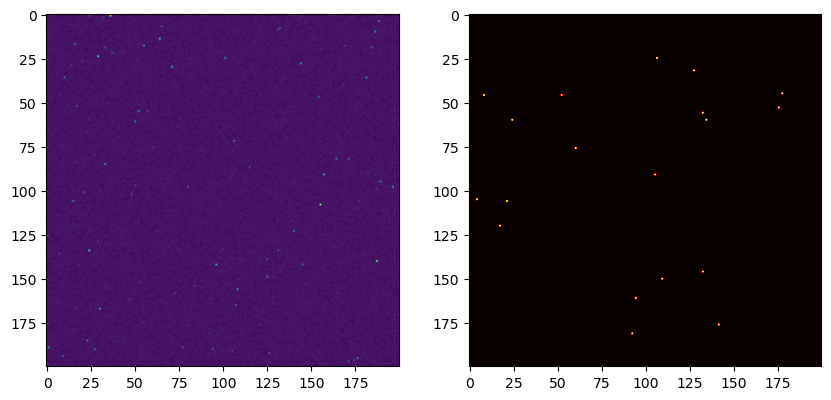

In [30]:
for i in imgstack:
    plot_faint_stars(i)